# AMME5710 Week 1 Tutorial

This activity is to be completed during the Week 1 tutorial. When you have completed the activity, you will need to show your results to the tutor who will check your work and that you have sufficiently completed the task: this needs to be completed during the tutorial time, so make sure you are ready to show the tutors your work during the last hour of the tutorial

**Tutorial Objectives and Instructions**:
- This tutorial will introduce you to basic techniques in image processing, the use of the OpenCV Computer Vision Library, and get you thinking about some of the issues in processing, interpreting and analysing image data.
- You should step through the example code snippets which explain and demonstrate the use of relevant functions in OpenCV.
- At the end of the notebook, there are several activities/exercises you will need to complete yourself. You can choose to:
    - Complete these inside the tutorial Jupyter Notebook using python code blocks
    - Write your own python code/scripts to produce the results requested

At any time, you can review the OpenCV documentation [https://docs.opencv.org/4.9.0/index.html](https://docs.opencv.org/4.9.0/index.html)l


## Importing OpenCV and other software modules
The OpenCV Computer Vision Library is the primary software library we will use in the course. It contains functions and modules for image and video processing, camera calibration, 3D reconstruction, feature extraction, segmentation, object detection and more. OpenCV has language support for many programming languages including C, C++, python, java, MATLAB etc.: in this course we will mainly use the python programming language.

In python, image data is stored in numpy arrays and matplotlib is used for displaying images in Jupyter Notebooks. OpenCV also offers functions and tools for displaying images/video outside of Notebooks.

In [1]:
# Load up opencv
import cv2 # module used for OpenCV
import numpy as np # We will use numpy for storing image data

# import matplotlib: used for displaying images in Jupyter Notebook
from matplotlib import pyplot as plt
%matplotlib inline 

## Load images from file
OpenCV will load image data as a multi-dimensional numpy array. We can use standard numpy indexing to access image data. For a standard colour image, the data is loaded as a three-dimensional array: the first dimension in the rows in the image, second dimension in the columns and third dimension is the colour: a (B,G,R) (Blue, Green, Red) ordering is used by default in OpenCV.


In [2]:
# Load some example images
im1 = cv2.imread('example_images_week1/apples.jpg')
im2 = cv2.imread('example_images_week1/chess.png')

In [3]:
# Let's have a look at some image data
print(im1)

[[[231 238 225]
  [232 239 226]
  [232 239 226]
  ...
  [223 231 220]
  [223 231 220]
  [222 230 219]]

 [[232 239 226]
  [232 239 226]
  [232 239 226]
  ...
  [223 231 220]
  [223 231 220]
  [222 230 219]]

 [[233 240 227]
  [233 240 227]
  [233 240 227]
  ...
  [223 231 220]
  [222 230 219]
  [222 230 219]]

 ...

 [[233 244 236]
  [233 244 236]
  [233 244 236]
  ...
  [227 240 232]
  [228 241 233]
  [228 241 233]]

 [[233 244 236]
  [233 244 236]
  [234 245 237]
  ...
  [228 241 233]
  [228 241 233]
  [229 242 234]]

 [[233 244 236]
  [234 245 237]
  [234 245 237]
  ...
  [228 241 233]
  [229 242 234]
  [229 242 234]]]


In [4]:
# Image data is stored as a numpy array: we can treat it like any other numpy data
print("Image Dimensions: (height, width, depth):", im1.shape)
print("Image data at coordinate (y=100, x=200):", im1[100,200])

Image Dimensions: (height, width, depth): (640, 428, 3)
Image data at coordinate (y=100, x=200): [199 244 228]


## Displaying images (in a notebook)
To display images in a Jupyter notebook, it's best to use matplotlib: the function "imshow" can produce an inline plot in our document. Note that the expected colour ordering for matplotlib is (R,G,B) unlike OpenCV which uses (B,G,R): you can quickly convert between colour orderings using the "cvtColor" method as shown below:

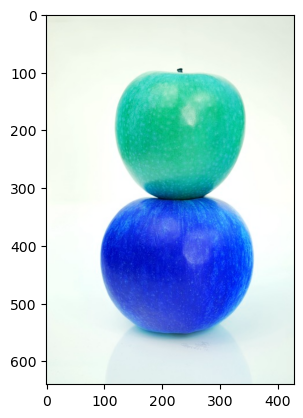

In [5]:
# display image (matplotlib)
plt.imshow(im1)

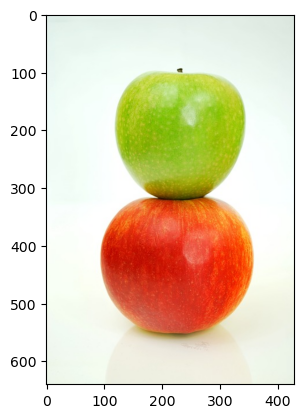

In [6]:
# display image (matplotlib) with corrected colours
im_RGB = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
plt.imshow(im_RGB)

## Resizing and working with colour channels
The following code snippets demonstrate functions in OpenCV for resizing image data and working with the different colour channels in an image.

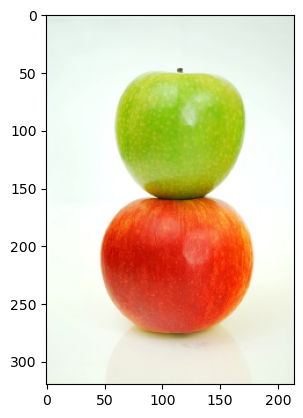

In [7]:
# resize the image
im1_small = cv2.resize(im1, (214, 320)) # half of original size (640, 428) NOTE: (horizontal, vertical) ordering
#im1_small = cv2.resize(im1, (0,0), fx=0.5, fy=0.5) # can use fx, fy optional arguments as scaling factors
#im1_small = cv2.resize(im1, (0,0), fx=0.1, fy=0.1) # i.e. 10% of original size
plt.imshow(cv2.cvtColor(im1_small, cv2.COLOR_BGR2RGB))

New image size: (640, 428)


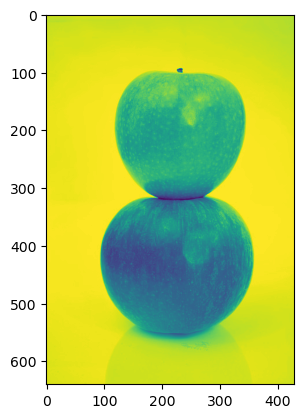

In [8]:
# Working with colour channels and conversions (convert to grayscale)
im_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
print("New image size:", im_gray.shape)
plt.imshow(im_gray) # display with default colour map (viridis)
#plt.imshow(im_gray, cmap=plt.get_cmap('gray')) # display as true grayscale image

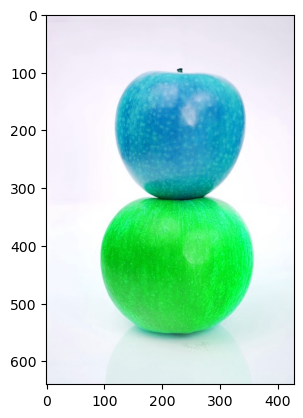

In [9]:
# Merge/Split channels
im_blue, im_green, im_red = cv2.split(im1) # split-up into separate channels
im1_altered = cv2.merge((im_green, im_red, im_blue)) # Merge back together in different order

plt.imshow(cv2.cvtColor(im1_altered, cv2.COLOR_BGR2RGB))

## Image Arithmetic Operations
During the Week 1 lecture, we explore image arithmetic operations in which operations are performed on images on a pixel-by-pixel basis. the following code snippets demonstrate the use of some of these operations.

Original Image Dimensions: 700 by 386 pixels


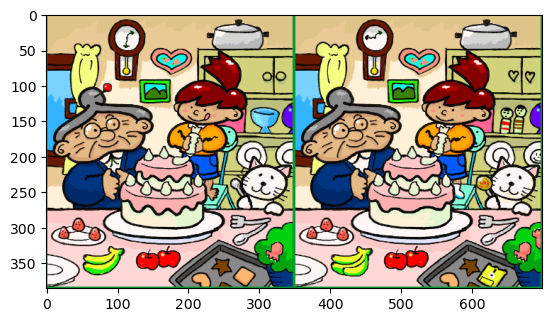

In [34]:
# Image arithmetic operations

# Load the "Spot the Difference" Image
img_spot = cv2.imread('example_images_week1/spot_the_difference.png')
height, width, depth = img_spot.shape
print('Original Image Dimensions:',width,'by',height,'pixels')
plt.imshow(cv2.cvtColor(img_spot, cv2.COLOR_BGR2RGB))

# crop left and right sides
img_spot_left = img_spot[:,:int(width/2),:] # Using standard python/numpy array indexing
img_spot_right = img_spot[:,int(width/2):,:]


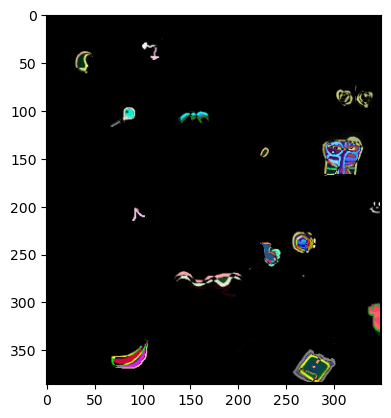

In [35]:
# Image arithmetic operations
# try uncommenting and running the following different operations to experiment

# Scale images
#im_result = 2*img_spot_left # output is still uint8, in this case overflow wraps around
#im_result = 2.0*img_spot_left # output floating point: can't use cvtColor, and imshow assumes in range [0,1]

# Add images
#im_result = img_spot_left + img_spot_right # can use numpy operations, in this case overflow wraps around
#im_result = cv2.add(img_spot_left, img_spot_right) # using opencv function, overflow saturates

# difference images
im_result = cv2.absdiff(img_spot_left, img_spot_right)

# Show either full three channel image, or as grayscale
plt.imshow(cv2.cvtColor(im_result, cv2.COLOR_BGR2RGB))
#plt.imshow(cv2.cvtColor(im_result, cv2.COLOR_BGR2GRAY), cmap=plt.get_cmap('gray'))

## Annotating Image data in OpenCV
The following code snippet demonstrates the use of functions that can draw basic annotations and shapes onto image data. These functions are useful for displaying data or visualising the outputs of certain operations or image processing results.

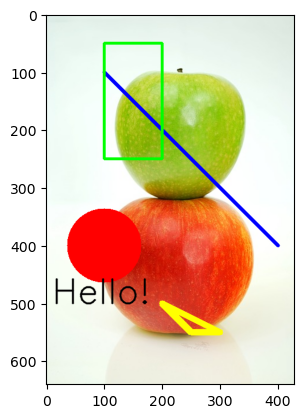

In [12]:
# Annotate some basic drawings on the image
im_final = im1.copy() # copy the image first, we will draw onto the copied image and display it

cv2.line(im_final,(100,100),(400,400),(255,0,0),5) # (image, start coord, end coord, (B,G,R), width)
cv2.rectangle(im_final,(100,50),(200,250),(0,255,0),3) # (image, (top left coord), (bottom right coord), (B,G,R), width)
cv2.circle(im_final,(100,400), 64, (0,0,255), -1) # (image, center coord, radius, (B,G,R), width)

points = np.array([[200,500],[250,550],[300,550]])
cv2.polylines(im_final,[points],True,(0,255,255),10) # (image, [points], is_closed?, colour, width)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(im_final,'Hello!',(10,500),font,2,(0,0,0),2,cv2.LINE_AA) # (image, text string, position, font, fontsize, colour)

# show the image we drew on
plt.imshow(cv2.cvtColor(im_final, cv2.COLOR_BGR2RGB))

## Image Histograms and Histogram Equalisation
During the week 1 lecture, we discussed explored image histograms and algorithms for contrast stretching and histogram equalisation. The following code snippets demonstrate the use of related functions in OpenCV.

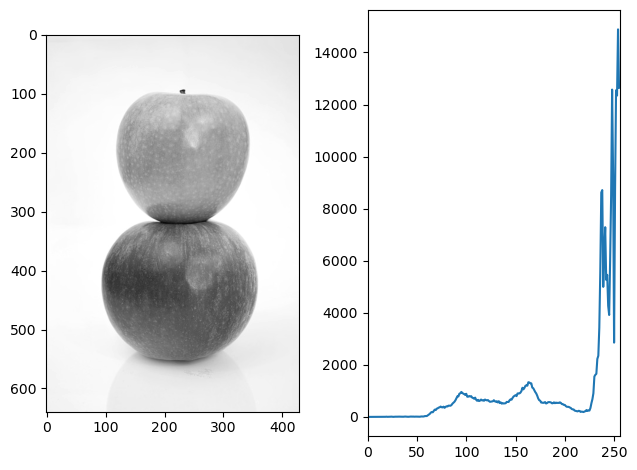

In [13]:
# Image Histograms
im1_gray = cv2.imread('example_images_week1/apples.jpg', cv2.IMREAD_GRAYSCALE) # read-in and convert to grayscale

# Calculate image histogram values
hist = cv2.calcHist([im1_gray],[0],None,[256],[0,256]) # ([img],[chanels],mask,bin_count,range)

# Plot the histogram next to the image
plt.subplot(121)
plt.imshow(im1_gray, 'gray')

plt.subplot(122)
plt.plot(hist)
plt.xlim([0,256])

plt.tight_layout()

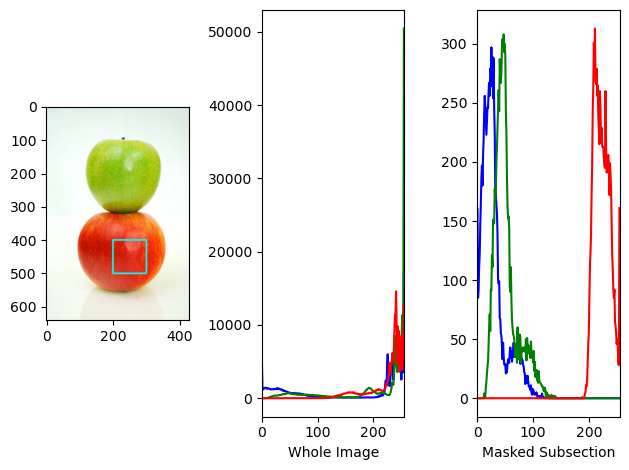

In [14]:
# Image Histograms (separate colour channels, using masks)

# separate channel histograms
hist_blue = cv2.calcHist([im1],[0],None,[256],[0,256])
hist_green = cv2.calcHist([im1],[1],None,[256],[0,256])
hist_red = cv2.calcHist([im1],[2],None,[256],[0,256])

# histograms of sub-window
mask = np.zeros(im1.shape[0:2], np.uint8)
mask[400:500, 200:300] = 255

hist_blue_subwindow = cv2.calcHist([im1],[0],mask,[256],[0,256])
hist_green_subwindow = cv2.calcHist([im1],[1],mask,[256],[0,256])
hist_red_subwindow = cv2.calcHist([im1],[2],mask,[256],[0,256])

# plotting
plt.subplot(131)
im1_display = im1.copy()
cv2.rectangle(im1_display,(200,400),(300,500),(255,255,0),3) # show mask location

plt.imshow(cv2.cvtColor(im1_display, cv2.COLOR_BGR2RGB))

plt.subplot(132)
plt.plot(hist_blue,'b')
plt.plot(hist_green,'g')
plt.plot(hist_red,'r')
plt.xlim([0,256])
plt.xlabel('Whole Image')

plt.subplot(133)
plt.plot(hist_blue_subwindow,'b')
plt.plot(hist_green_subwindow,'g')
plt.plot(hist_red_subwindow,'r')
plt.xlim([0,256])
plt.xlabel('Masked Subsection')

plt.tight_layout()

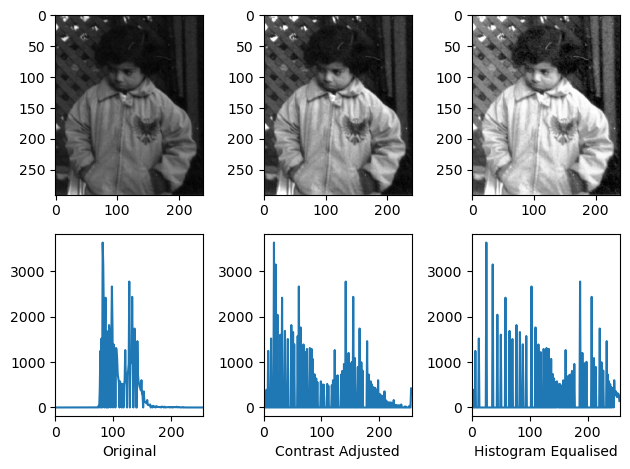

In [15]:
# Histogram Equalisation
im_pout = cv2.imread('example_images_week1/pout.tif', cv2.IMREAD_GRAYSCALE)

# contrast adjust the image
A = 75.0 # some stretching parameters
B = 170.0
C = 0.0
D = 255.0 
im_adjusted = ((D-C)/(B-A))*(im_pout-A)+C # apply contrast adjustment
im_adjusted = np.clip(im_adjusted, 0, 255).astype('uint8') # clip to [0,255] and convert to uint8

# histogram equalise the image
im_equalised = cv2.equalizeHist(im_pout)

# Plotting
plt.subplot(231)
plt.imshow(im_pout,'gray')

plt.subplot(232)
plt.imshow(im_adjusted,'gray')

plt.subplot(233)
plt.imshow(im_equalised,'gray')

plt.subplot(234)
hist_orig = cv2.calcHist([im_pout],[0],None,[256],[0,256])
plt.plot(hist_orig)
plt.xlim([0,256])
plt.xlabel('Original')

plt.subplot(235)
hist_adjusted = cv2.calcHist([im_adjusted],[0],None,[256],[0,256])
plt.plot(hist_adjusted)
plt.xlim([0,256])
plt.xlabel('Contrast Adjusted')

plt.subplot(236)
hist_equalised = cv2.calcHist([im_equalised],[0],None,[256],[0,256])
plt.plot(hist_equalised)
plt.xlim([0,256])
plt.xlabel('Histogram Equalised')

plt.tight_layout()

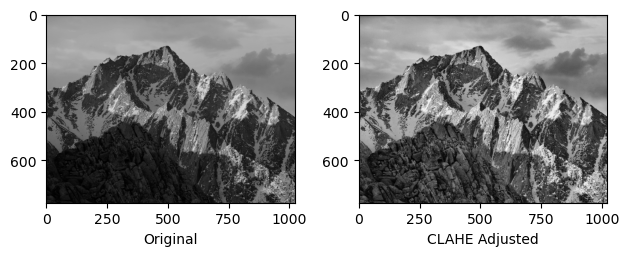

In [16]:
# Spatially Adaptive Histogram Equalisation
# using CLAHE (Contrast Limited Adaptive Histogram Equalisation)

im_mountain = cv2.imread('example_images_week1/mountain.png', cv2.IMREAD_GRAYSCALE)

# CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
im_equalised2 = clahe.apply(im_mountain)

# Plotting
plt.subplot(121)
plt.imshow(im_mountain,'gray')
plt.xlabel('Original')

plt.subplot(122)
plt.imshow(im_equalised2,'gray')
plt.xlabel('CLAHE Adjusted')

plt.tight_layout()

## Image Thresholding
Thresholding is the process of assigning pixels in an image to discrete classes based on whether the pixel’s value is above or below a given threshold. During the Week 1 lecture we explored methods for thresholding including Otsu's method. The following code snippets demonstrate functions used for thresholding in OpenCV.

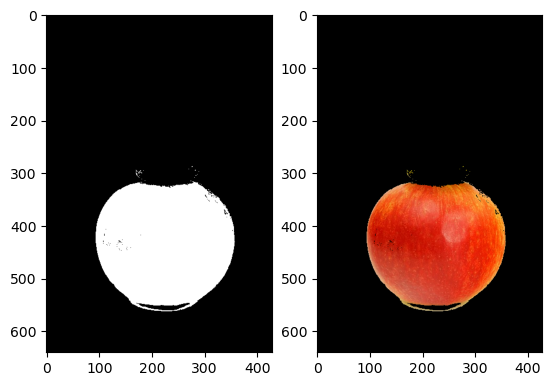

In [17]:
# Thresholding (using standard numpy array functions)
im_thr = np.logical_and( (im1[:,:,2] > 180), (im1[:,:,1] < 180) ) # using standard numpy

im_temp = im1.copy()
im_temp[~im_thr, :] = (0,0,0) # mask-out (set to black) non-True pixels

plt.subplot(121)
plt.imshow(im_thr.astype(int),'gray')

plt.subplot(122)
plt.imshow(cv2.cvtColor(im_temp, cv2.COLOR_BGR2RGB))

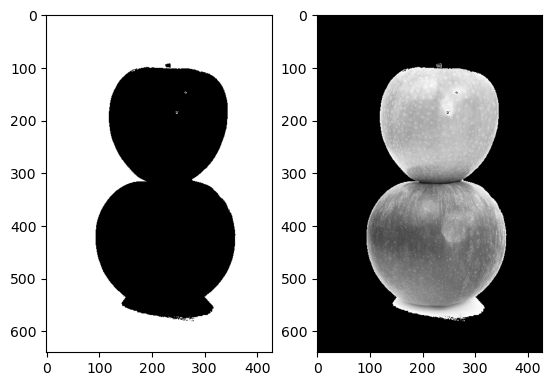

In [18]:
# Thresholding (using OpenCV functions)

im1_gray = cv2.imread('example_images_week1/apples.jpg', cv2.IMREAD_GRAYSCALE)

# Thresholding: return 0 if value <= "thresh_val", else return "set_val"
thresh_val = 220
set_val = 255
ret, thresh_im1 = cv2.threshold(im1_gray, thresh_val, set_val, cv2.THRESH_BINARY)
ret, thresh_im1a = cv2.threshold(im1_gray, thresh_val, set_val, cv2.THRESH_TOZERO_INV)
# see also: cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV for other threshold types

plt.subplot(121)
plt.imshow(thresh_im1, 'gray')

plt.subplot(122)
plt.imshow(thresh_im1a, 'gray')

Threshold Value (Otsu): 100


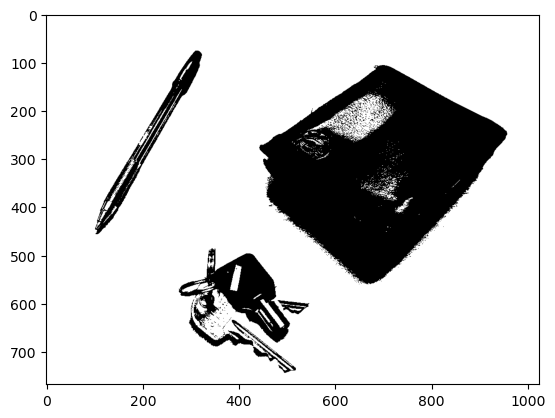

In [19]:
# Thresholding using Otsu's method

im1_gray = cv2.imread('example_images_week1/desk001.jpg', cv2.IMREAD_GRAYSCALE)

thresh_val = 150 # parameter is ignored when using "THRESH_OTSU"
set_val = 255
thresh_val_used, thresh_im1 = cv2.threshold(im1_gray, thresh_val, set_val, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(thresh_im1, 'gray')

print("Threshold Value (Otsu): %d"%(thresh_val_used))

# Exercise/Activities to Complete
The following activities should be completed during the Friday tutorial and shown to your tutor to be marked off.


# Exercise 1: Chess Piece ID
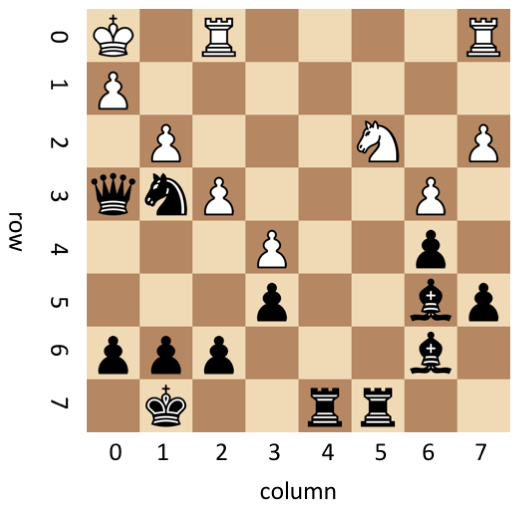

Open the image 'chess.png', which contains a visual depiction of a chess game.
- Write a function that is provided with two arguments (row, col) which correspond to a board position (see above figure). The function should produce and display a cropped image of the corresponding board position, displaying the piece that currently occupies this position.
- Try extending the function such that it indicates if the current square is empty, contains and white piece or contains a black piece. Hint: white pieces are mostly made of exactly white pixels (i.e. RGB = [255,255,255]) and black pieces mostly made of exactly black pixels (i.e. RGB = [0,0,0]).

Black Piece


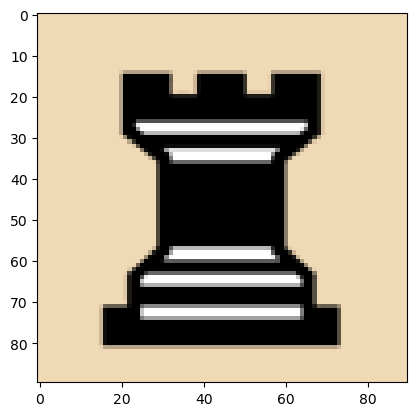

In [157]:
#Write your code here, or in a separate python script
def position(row, col): 

    im_bottom = row*720//8
    im_top = im_bottom + 90
    im_left = col*720//8
    im_right = im_left+90

    image = cv2.imread("example_images_week1/chess.png")

    image_cropped = image[im_bottom:im_top, im_left:im_right]

    plt.imshow(cv2.cvtColor(image_cropped, cv2.COLOR_BGR2RGB))

    height, width, depth = image_cropped.shape

    white = np.array([255,255,255])
    black = np.array([0,0,0])

    num_white= np.sum(np.all(image_cropped == white, axis =2))
    num_black= np.sum(np.all(image_cropped == black, axis =2))

    if num_white > num_black: 
        print("White Piece")
    elif num_black > num_white: 
        print("Black Piece")
    else: 
        print("None")

    return None

position(7,5)




## Exercise 2: Histogram Equalisation
Open up the example images 'fish001.jpg', 'fish002.png' and 'underwater001.png'. Images taken underwater are typically dark, exhibit poor contrast and have a blue-green colour cast (due to attenuation of red light in water).

- Use linear contrast enhancement, histogram equalisation and adaptive histogram equalisation methods to improve the quality of the images.
- Try applying these methods to a grayscale version of the image and to each of the colour channels separately. Have a play with the different parameters of each method and see how many fish you can observe clearly.


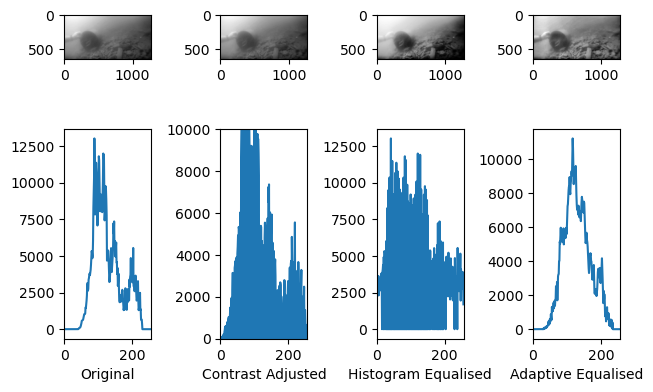

In [ ]:
# Write your code here, or in a separate python script

fish_1 = cv2.imread("example_images_week1/fish001.jpg", cv2.IMREAD_GRAYSCALE)
fish_2 = cv2.imread("example_images_week1/fish002.png", cv2.IMREAD_GRAYSCALE)
underwater = cv2.imread("example_images_week1/underwater001.png", cv2.IMREAD_GRAYSCALE)

def histogram_equalisation(im_pout): 

    # contrast adjust the image
    A = np.min(im_pout)
    B = np.max(im_pout)
    C = 0.0
    D = 255.0 
    im_adjusted = ((D-C)/(B-A))*(im_pout-A)+C # apply contrast adjustment
    im_adjusted = np.clip(im_adjusted, 0, 255).astype('uint8') # clip to [0,255] and convert to uint8

    # histogram equalise the image
    im_equalised = cv2.equalizeHist(im_pout)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    im_equalised2 = clahe.apply(im_pout)

    # Plotting
    plt.subplot(241)
    plt.imshow(im_pout,'gray')

    plt.subplot(242)
    plt.imshow(im_adjusted,'gray')

    plt.subplot(243)
    plt.imshow(im_equalised,'gray')

    plt.subplot(244)
    plt.imshow(im_equalised2,'gray')

    plt.subplot(245)
    hist_orig = cv2.calcHist([im_pout],[0],None,[256],[0,256])
    plt.plot(hist_orig)
    plt.xlim([0,256])
    plt.xlabel('Original')

    plt.subplot(246)
    hist_adjusted = cv2.calcHist([im_adjusted],[0],None,[256],[0,256])
    plt.plot(hist_adjusted)
    plt.xlim([0,256])
    plt.ylim([0,10000])
    plt.xlabel('Contrast Adjusted')

    plt.subplot(247)
    hist_equalised = cv2.calcHist([im_equalised],[0],None,[256],[0,256])
    plt.plot(hist_equalised)
    plt.xlim([0,256])
    plt.xlabel('Histogram Equalised')

    plt.subplot(248)
    hist_equalised2 = cv2.calcHist([im_equalised2],[0],None,[256],[0,256])
    plt.plot(hist_equalised2)
    plt.xlim([0,256])
    plt.xlabel('Adaptive Equalised')

    plt.tight_layout()

    return 


histogram_equalisation(underwater)




## Exercise 3: Thresholding
Load the colour image 'apples.jpg' and develop code to segment the image into three classes: background, red apple, green apple using thresholding operations. 
Plot the segmented image side-by-side with the original. For the segmented image, produce a graph were red apple pixels are coloured red, green apples pixels green and background pixels white.


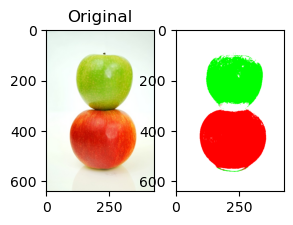

In [174]:
# Write your code here, or in a separate python script

apples = cv2.imread("example_images_week1/apples.jpg")

plt.subplot(141)
plt.imshow(cv2.cvtColor(apples, cv2.COLOR_BGR2RGB))
plt.title("Original")

# Thresholding: return 0 if value <= "thresh_val", else return "set_val"
RED_PIXEL = 180
GREEN_PIXEL = 180
window = 20
set_val = 255


# Creating red masks and green masks 
red_thr = np.logical_and( (apples[:,:,2] > RED_PIXEL), (apples[:,:,1] < RED_PIXEL) ) # using standard numpy

green_thr = np.logical_and( (apples[:,:,1] > GREEN_PIXEL - window), (apples[:,:,2] < GREEN_PIXEL+window) )

red_apples = apples.copy()
red_apples[:, :] = (255,255,255) # mask-out (set to black) non-True pixels

red_apples[red_thr, :] = (0,0,255) # mask-out 
red_apples[green_thr, :] = (0,255, 0) # mask-out 


plt.subplot(142)
# plt.imshow(red_thr.astype(int),'gray')
plt.imshow(cv2.cvtColor(red_apples, cv2.COLOR_BGR2RGB))




## Exercise 4 (Optional): Spot the Difference!
Load the image 'spot_the_difference.png'. It contains two images side-by-side that are identical except for a few artistic changes. Write a script that produces a helper/solution image to help someone spot the differences, like this:

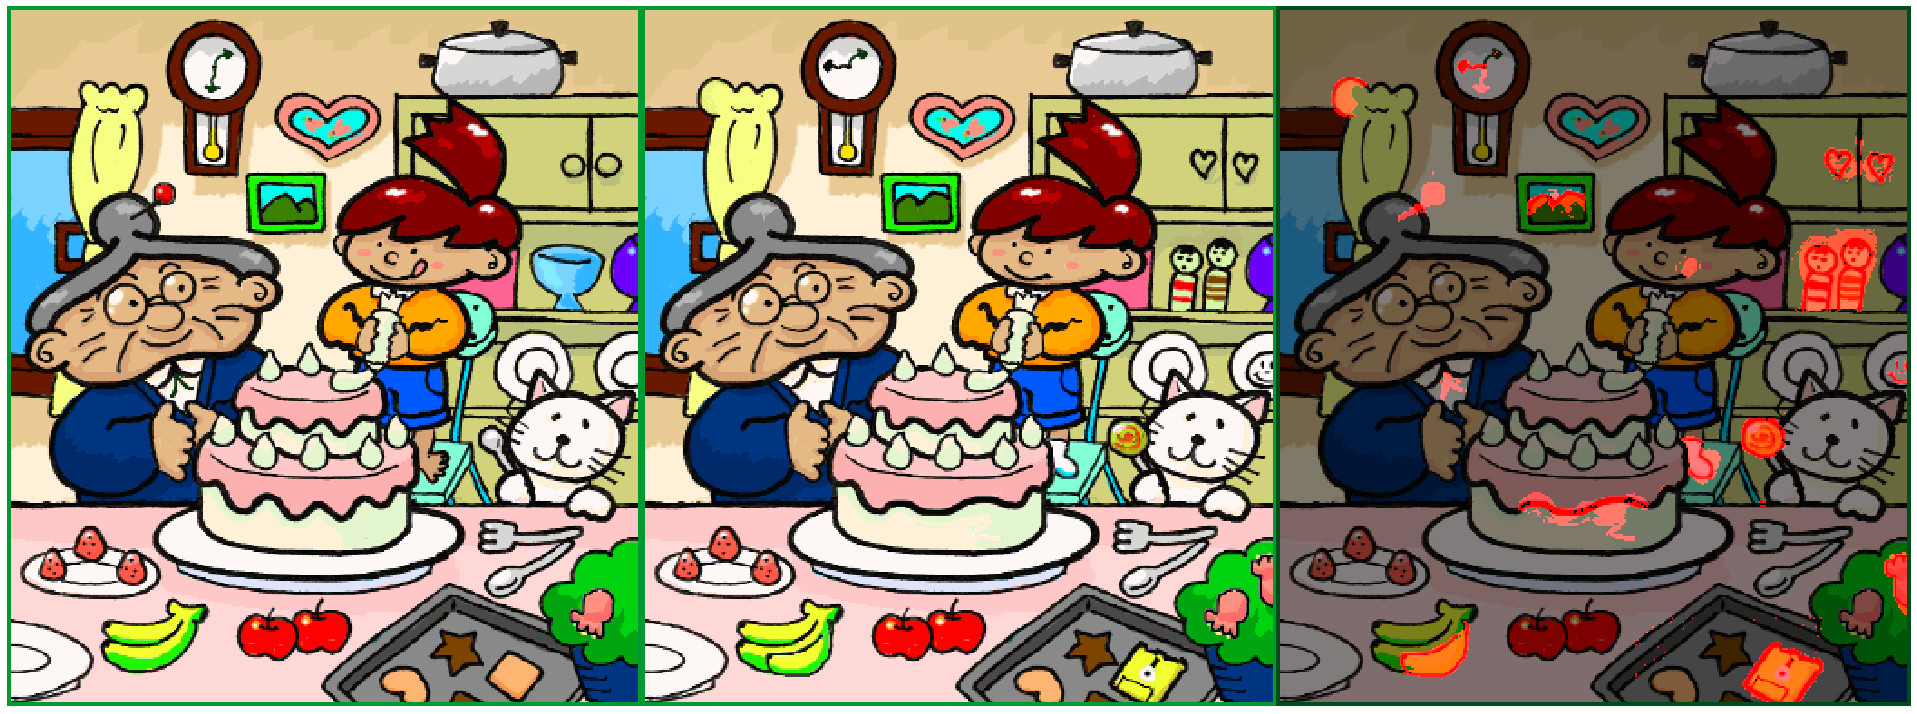

If you are really keen, try to write an algorithm to count the differences. Have a look at the function 'connectedComponents', e.g.:

*num_components, label_img = cv2.connectedComponents(thresh_img)*

It computes a 'label_img' which contains the connected components of an image: this can locate connected blobs of thresholded pixel. The algorithm cycles through each thresholded pixel and performs a “flood-fill”, until all pixels are labelled. This produces an image where pixels for a given blob have a common label number.

We will explore these types of functions in the next few weeks.


In [23]:
# Write your code here, or in a separate python script
